# Лабораторная работа №4
### Воложанин В.О. ИВТ 1.3

### Импорт библиотек и загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

data = pd.read_csv('web_traffic.tsv', delimiter='\t', names=['hour', 'n_requests'])
data = data.dropna()

input_var = 'hour'
target_var = 'n_requests'

hours_data = data[input_var]
requests_data = data[target_var]

### Визуализация данных

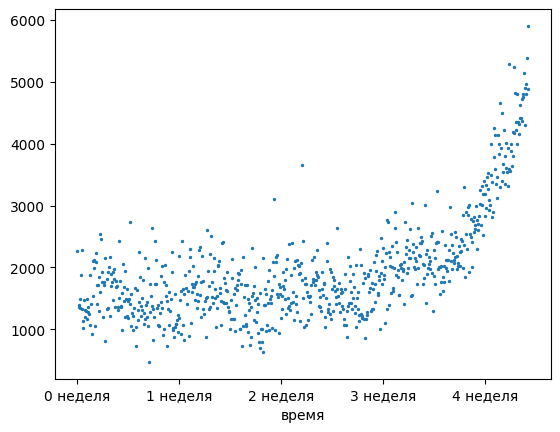

In [2]:
plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')
plt.xticks([w*7*24 for w in range(6)], ["%i неделя" %w for w in range(6)])
plt.autoscale(tight=False)
plt.show()

### Создание моделей полиномиальной регрессии

/opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.2.1/libexec/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: Futu

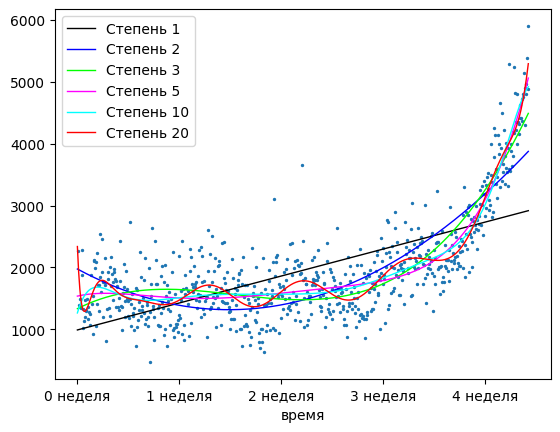

In [3]:
degrees = [1, 2, 3, 5, 10, 20]
colors = {1: 'black', 2: 'blue', 3: 'lime', 5: 'magenta', 10: 'cyan', 20: 'red'}
metrics = {}

plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')
plt.xticks([w*7*24 for w in range(6)], ["%i неделя" %w for w in range(6)])

for degree in degrees:
    coeffs = np.polyfit(hours_data, requests_data, degree)
    poly = np.poly1d(coeffs)
    
    f_x = np.linspace(0, hours_data.max(), len(hours_data))
    f_y = poly(f_x)
    plt.plot(f_x, f_y, linewidth=1.0, color=colors[degree], label=f'Степень {degree}')
    
    mse = mean_squared_error(requests_data, poly(hours_data))
    rmse = mean_squared_error(requests_data, poly(hours_data), squared=False)
    mae = mean_absolute_error(requests_data, poly(hours_data))
    manual_rmse = np.sqrt(np.mean((requests_data - poly(hours_data)) ** 2))
    
    metrics[degree] = {
        'coeffs': coeffs,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'manual_rmse': manual_rmse
    }

plt.legend()
plt.autoscale(tight=False)
plt.show()

### Отображение параметров и метрик

In [4]:
for degree, metric in metrics.items():
    print(f"Степень {degree} полинома:")
    print(f"Параметры модели: {metric['coeffs']}")
    print(f"MSE: {metric['mse']}")
    print(f"RMSE: {metric['rmse']}")
    print(f"MAE: {metric['mae']}")
    print(f"Manual RMSE: {metric['manual_rmse']}")
    print()

Степень 1 полинома:
Параметры модели: [  2.59619213 989.02487106]
MSE: 431822.81270718103
RMSE: 657.1322642415156
MAE: 504.88101037565264
Manual RMSE: 657.1322642415156

Степень 2 полинома:
Параметры модели: [ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
MSE: 244875.52092269278
RMSE: 494.84898799804853
MAE: 389.2663189980563
Manual RMSE: 494.84898799804853

Степень 3 полинома:
Параметры модели: [ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]
MSE: 189592.0326962248
RMSE: 435.4216722858714
MAE: 344.1036970490545
Manual RMSE: 435.4216722858714

Степень 5 полинома:
Параметры модели: [ 2.16470951e-10 -3.13405153e-07  1.63844797e-04 -3.41497485e-02
  2.24785575e+00  1.53616050e+03]
MSE: 169339.74770906614
RMSE: 411.5091101167338
MAE: 325.13909896864163
Manual RMSE: 411.5091101167338

Степень 10 полинома:
Параметры модели: [-3.73981969e-22  1.36473757e-18 -2.14294406e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604588e-05  1.19167041e-02
 -9.41618607e-01  3.3

### Метрики

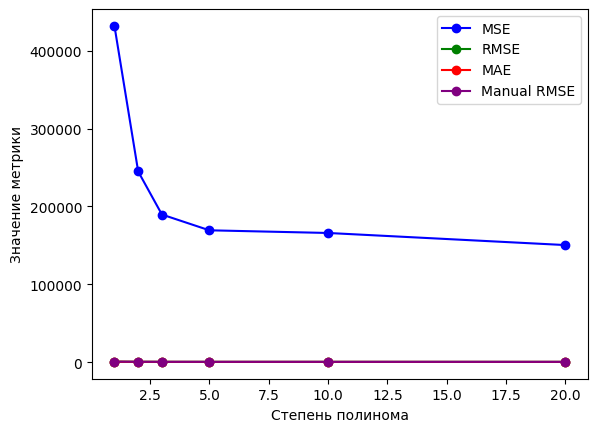

In [5]:
degrees = list(metrics.keys())
mse_values = [metrics[d]['mse'] for d in degrees]
rmse_values = [metrics[d]['rmse'] for d in degrees]
mae_values = [metrics[d]['mae'] for d in degrees]
manual_rmse_values = [metrics[d]['manual_rmse'] for d in degrees]

plt.plot(degrees, mse_values, label='MSE', color='blue', marker='o')
plt.plot(degrees, rmse_values, label='RMSE', color='green', marker='o')
plt.plot(degrees, mae_values, label='MAE', color='red', marker='o')
plt.plot(degrees, manual_rmse_values, label='Manual RMSE', color='purple', marker='o')
plt.xlabel('Степень полинома')
plt.ylabel('Значение метрики')
plt.legend()
plt.show()